In [1]:
!pip install morpheus-astro

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from morpheus.classifier import Classifier
from morpheus.data import example

# ExAMPLE IMAGE TO EXAMINE

In [5]:
dir(Classifier)

['_Classifier__X',
 '_Classifier__graph',
 '_Classifier__session',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_arrays_same_size',
 '_build_parallel_classification_structure',
 '_call_morpheus',
 '_classify_arrays',
 '_deblend',
 '_get_split_length',
 '_get_split_slice_generator',
 '_make_runnable_file',
 '_merge_parallel_means_vars',
 '_merge_parallel_rank_votes',
 '_parse_files',
 '_retrieve_classifications',
 '_run_parallel_jobs',
 '_standardize_img',
 '_stitch_parallel_classifications',
 '_valid_input_types_is_str',
 '_validate_parallel_params',
 '_variables_not_none',
 'aggregation_scheme_flux_weighted',
 'catalog_from_classified',
 'classify',
 'colorize_cla

In [6]:
dir(example)

['List',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'fits',
 'get_sample',
 'np',
 'os']

In [4]:
h, j, v, z = example.get_sample()

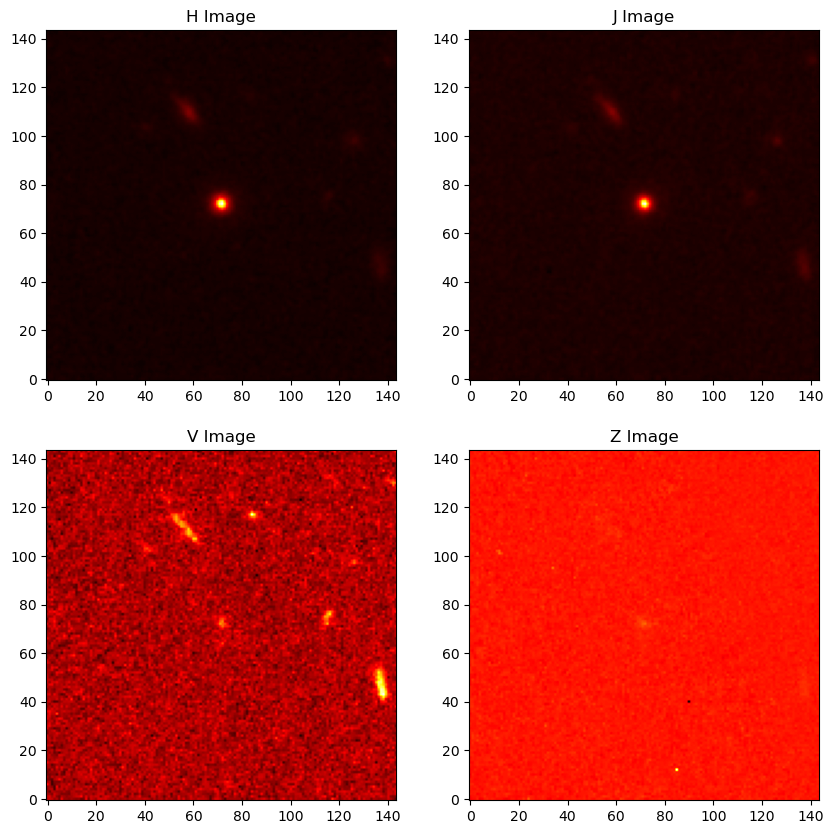

In [26]:
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
axes = np.array(axes).flatten()

for ax, arr, band in zip(axes, [h,j,v,z], 'HJVZ'):
    ax.set_title(f'{band} Image')
    ax.imshow(arr, origin = 'lower', cmap = 'hot')
plt.show()

# Classify Images

In [27]:
classified = Classifier.classify(h = h, j = j, v = v, z = z)

classifying:   0%|          | 0/11 [00:00<?, ?batch/s]C:\Users\savil\anaconda3\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
C:\Users\savil\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
C:\Users\savil\anaconda3\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\convolutional.py:414: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  w

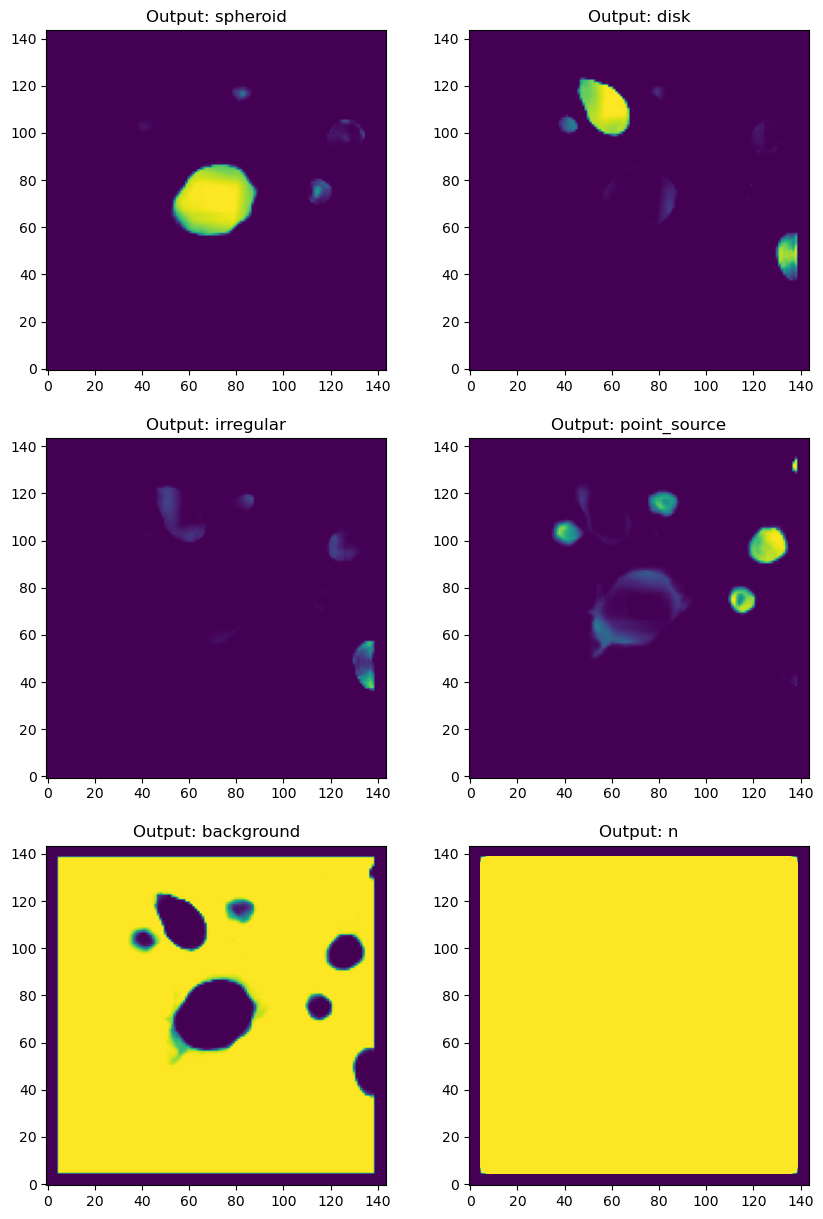

In [33]:
f, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10,15))
axes = np.array(axes).flatten()

for i, k in enumerate(classified):
    axes[i].set_title(f'Output: {k}')
    axes[i].imshow(classified[k], origin = 'lower', vmin = 0, vmax = 1, cmap = 'viridis')

# Segmentation Map

In [35]:
mask = np.zeros_like(h, np.int)
mask[5:-5, 5:-5] = 1

segmap = Classifier.segmap_from_classified(classified, h, mask = mask)

Building Markers...
Watershedding...


C:\Users\savil\anaconda3\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
Deblending: 100%|██████████| 6/6 [00:00<00:00, 3004.16it/s]


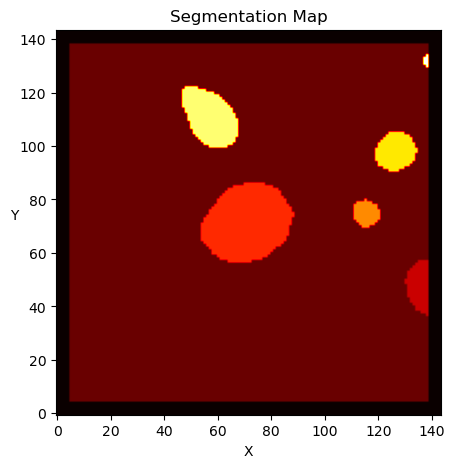

In [55]:
plt.figure(figsize = (10,5))
plt.imshow(segmap, origin = 'lower', cmap = 'hot')
plt.xlabel('X')
plt.ylabel('Y', rotation = 0)
plt.title('Segmentation Map')
plt.show()

# Cataloging

In [41]:
catalog = Classifier.catalog_from_classified(classified, h, segmap)

In [56]:
print('Source ID\tLocation(y,x)\tMorphology:[Sph,Dsk,Irr,Ps]')
for source in catalog:
    _id = source['id']
    loc = source['location']
    morph = np.round(source['morphology'], decimals = 3)
    print('{}\t\t{}\t{}'.format(_id, loc, morph))

Source ID	Location(y,x)	Morphology:[Sph,Dsk,Irr,Ps]
1		[44, 138]	[0.    0.689 0.306 0.005]
2		[72, 72]	[0.983 0.002 0.    0.014]
3		[76, 116]	[0.26  0.002 0.005 0.734]
4		[98, 126]	[0.035 0.017 0.074 0.874]
5		[110, 58]	[0.    0.948 0.048 0.003]
6		[131, 138]	[0. 0. 0. 1.]


100%|██████████| 144/144 [00:00<00:00, 3902.23it/s]


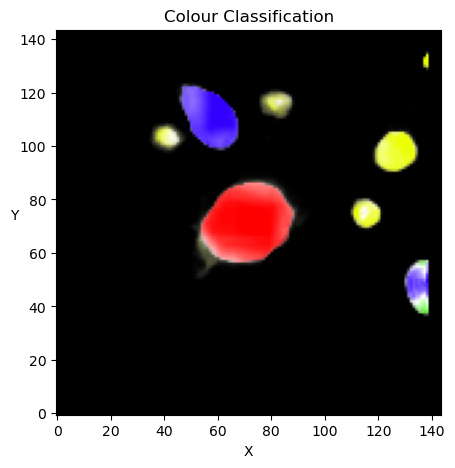

In [54]:
rgb = Classifier.colorize_classified(classified)
plt.figure(figsize = (10,5))
plt.imshow(rgb, origin = 'lower')
plt.xlabel('X')
plt.ylabel('Y', rotation = 0)
plt.title('Colour Classification')
plt.show()